In [2]:
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup

In [3]:
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set()

In [4]:
import re
import nltk

In [5]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
data = pandas.read_csv('archive.csv')
#print(data)
#print(data.tail())

print(len(data.index))
data.tail()

#a = data.iloc[0:2, 0:2] #2 rowss 2 columns

104


,Year,Honor,Name,Country,Birth Year,Death Year,Title,Category,Gender
99,2012,Person of the Year,Barack Obama,United States,1961.0,NaN,President of the United States,Politics,M
100,2013,Person of the Year,Pope Francis,Vatican City,1936.0,NaN,Pope of the Roman Catholic Church,Religion,M
101,2014,Person of the Year,The Ebola Fighters,NaN,NaN,NaN,NaN,Science,NaN
102,2015,Person of the Year,Angela Merkel,Germany,1954.0,NaN,Chancellor of Germany,Politics,F
103,2016,Person of the Year,Donald Trump,United States,1946.0,NaN,President of the United States,Politics,M


{'United States': 62, 'India': 1, 'France': 2, 'Ethiopia': 1, 'China': 4, 'Germany': 2, 'Soviet Union': 6, 'United Kingdom': 3, 'Iran': 2, 'West Germany': 2, 'Hungary': 1, 'Vatican City': 3, 'Saudi Arabia': 1, 'Egypt': 1, 'Poland': 1, nan: 5, 'Philippines': 1, 'Israel': 1, 'Palestine': 1, 'South Africa': 2, 'Ireland': 1, 'Russia': 1}


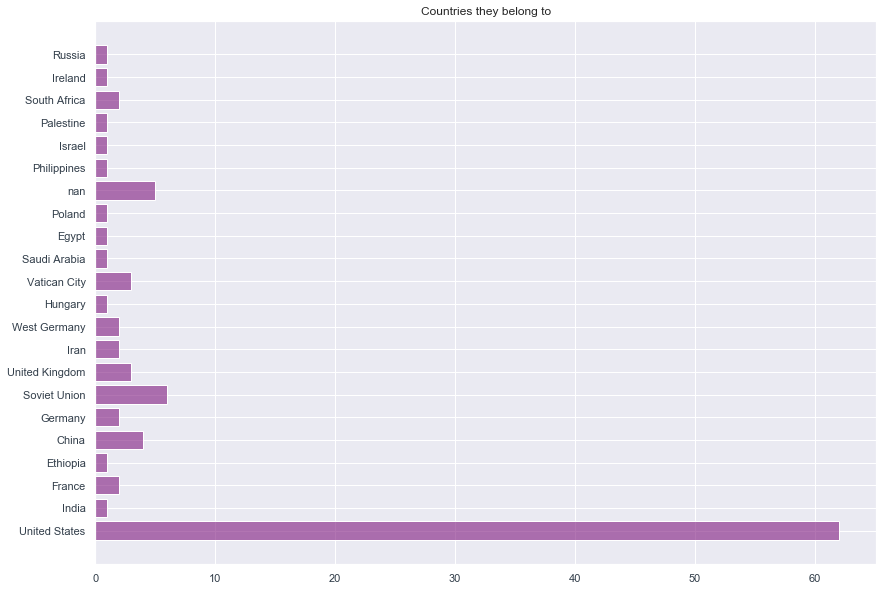

In [8]:
c = dict()
for i in range (0, len(data.index)):  
    country = data.iloc[i, 3]
    if country in c.keys():
        c[country] +=1
    else:
        c[country] =1
print(c)        


plt.barh(range(len(c)), list(c.values()), align='center', color = (0.5,0.1,0.5,0.6))
plt.yticks(range(len(c)), list(c.keys()))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
#plt.yticks(rotation=90)

#plt.rcParams['axes.edgecolor']='#333F4B'
#plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Countries they belong to')
#plt.xlabel('categories')
#plt.ylabel('values')
plt.show()



{nan: 1, 'Economics': 7, 'Diplomacy': 7, 'Revolution': 5, 'Politics': 43, 'War': 20, 'Space': 4, 'Science': 4, 'Religion': 3, 'Technology': 5, 'Environment': 1, 'Media': 1, 'Philanthropy': 3}


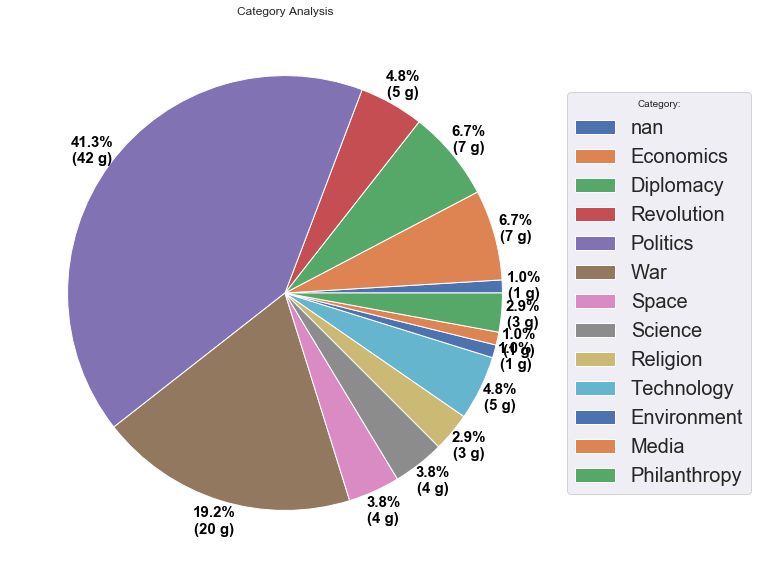

In [7]:
#trends

#d = { '1927': 0, '1937':0, '1947':0, '1957':0, '1967':0, '1977':0, '1987':0, '1997':0, '2007':0}
#l = []
cat = dict()
#year = dict()
for i in range(0, len(data.index)):  
    categ = data.iloc[i, 7]
    #year = data.iloc[i,0]
    if categ in cat.keys():
        cat[categ] +=1
    else:
        cat[categ] =1        
print(cat)





data = []
category = []
for x, y in cat.items():
    data.append(y)
    category.append(x)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)



ax = plt.gca()
ax.set_title("Category Analysis")
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="black"), pctdistance=1.1, labeldistance=2.0)
ax.legend(wedges, category, title="Category:", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 20})
plt.setp(autotexts, size=15, weight="bold")
fig = plt.gcf()
fig.set_size_inches(10,10)


plt.show()




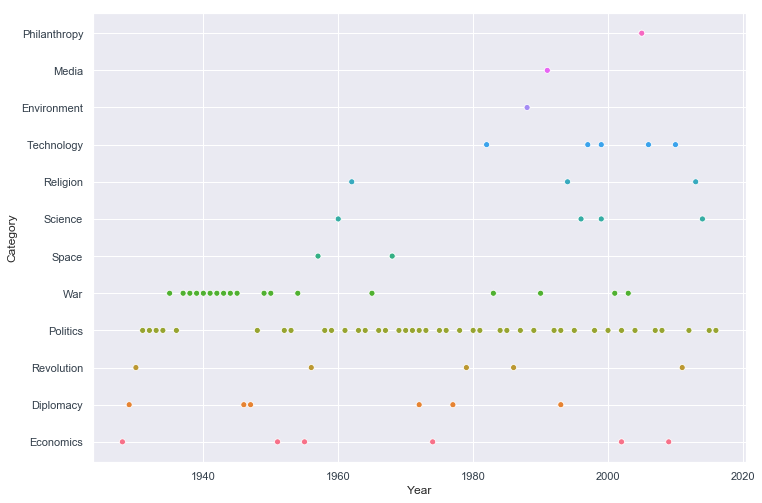

In [8]:
'''
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
'''
#%matplotlib inline
#sns.set()

data = pandas.read_csv('archive.csv')

sns.scatterplot(x='Year',y='Category',data=data, hue = 'Category', legend= False)
#plt.legend(loc='lower right')
plt.gcf().set_size_inches(11.7, 8.27)


In [9]:
others = dict()
female = dict() 
gender = { 'men': 0, 'women': 0} #both men and women

for i in range (0, len(data.index)):  
    gen = data.iloc[i, 8]
    if gen == 'M':
        gender['men'] += 1
    elif gen == 'F':
        name = data.iloc[i, 2]
        year = data.iloc[i, 0]
        gender['women'] += 1
        female[name] = year 
    else :
        name = data.iloc[i, 2]
        year = data.iloc[i, 0]
        others[name] = year
                
print(gender)
print("\n")
print(female)
print("\n")
print(others)

{'men': 86, 'women': 11}


{'Wallis Simpson': 1936, 'Chiang Kai-shek': 1937, 'Soong Mei-ling': 1937, 'Elizabeth II': 1952, 'American Women': 1975, 'Corazon Aquino': 1986, 'The\xa0Whistleblowers (Cynthia Cooper)': 2002, 'The\xa0Whistleblowers (Coleen Rowley)': 2002, 'The\xa0Whistleblowers (Sherron Watkins)': 2002, 'The Good Samaritans (Melinda Gates)': 2005, 'Angela Merkel': 2015}


{'The\xa0Middle Americans': 1969, 'The Computer': 1982, 'The Endangered\xa0Earth': 1988, 'The\xa0American Soldier': 2003, 'You': 2006, 'The Protester': 2011, 'The Ebola\xa0Fighters': 2014}


Charles Lindbergh 1927
[('may', 6), ('american', 3), ('spirit', 3), ('st', 3), ('louis', 3), ('pilot', 2), ('atlantic', 2), ('aug', 1), ('aviator', 1), ('rose', 1)]


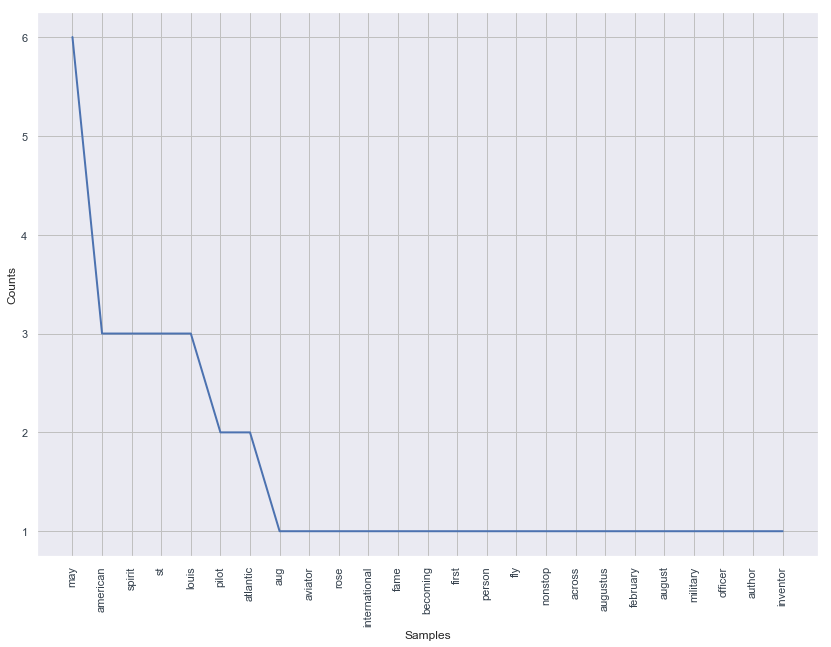

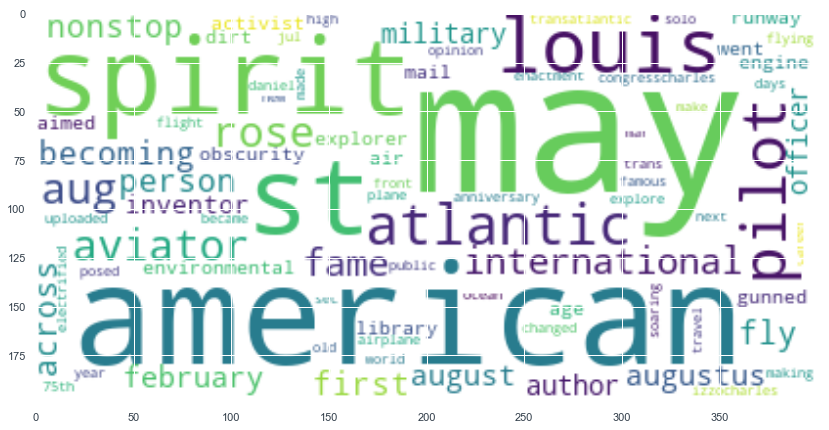

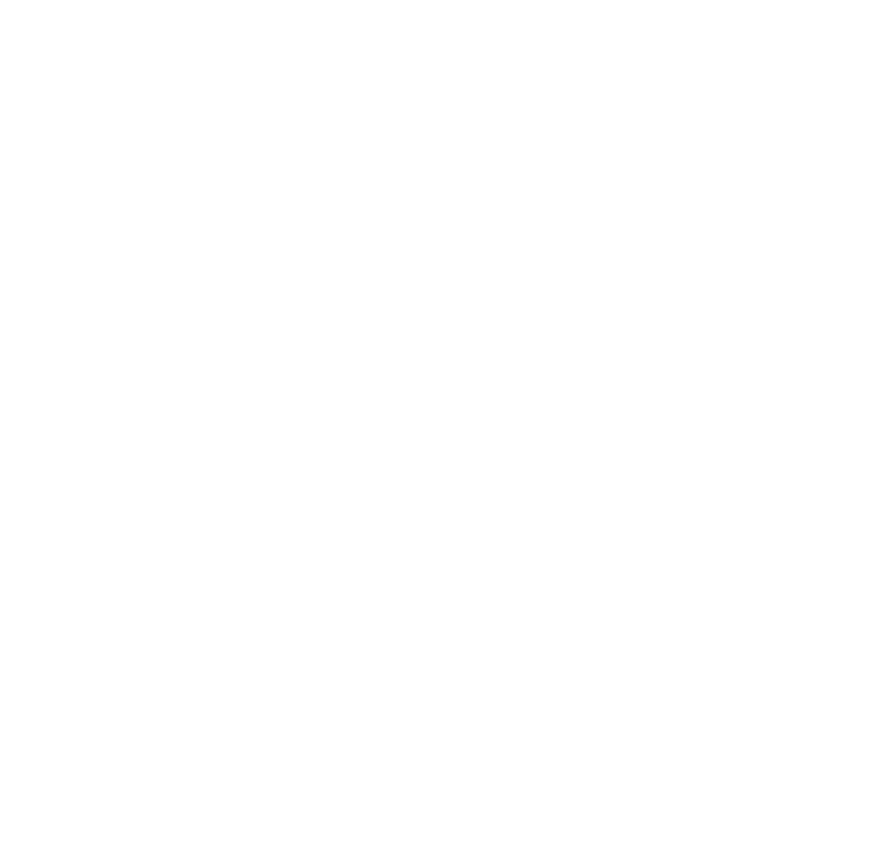

Walter Chrysler 1928
[('dodge', 5), ('percy', 5), ('plymouth', 4), ('corporation', 3), ('company', 3), ('p', 3), ('brothers', 3), ('desoto', 2), ('man', 2), ('year', 2)]


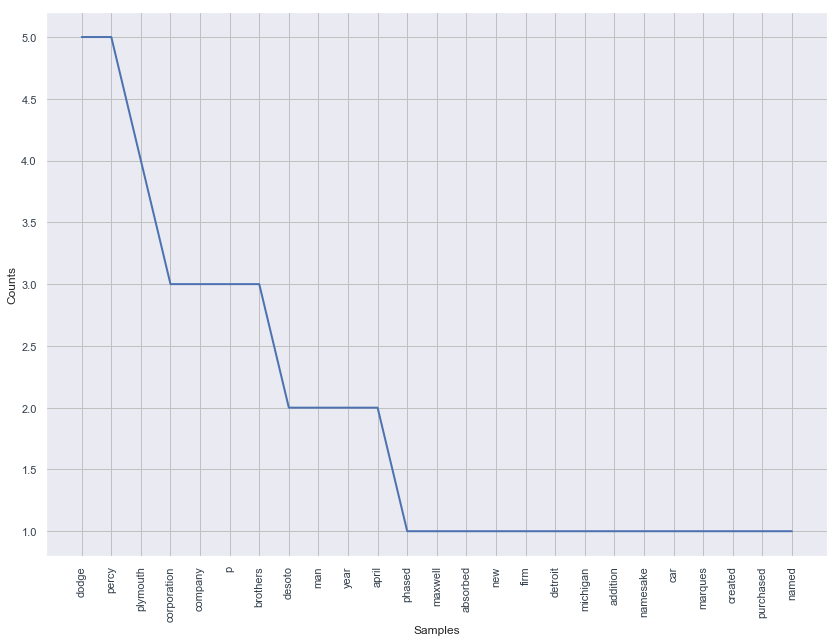

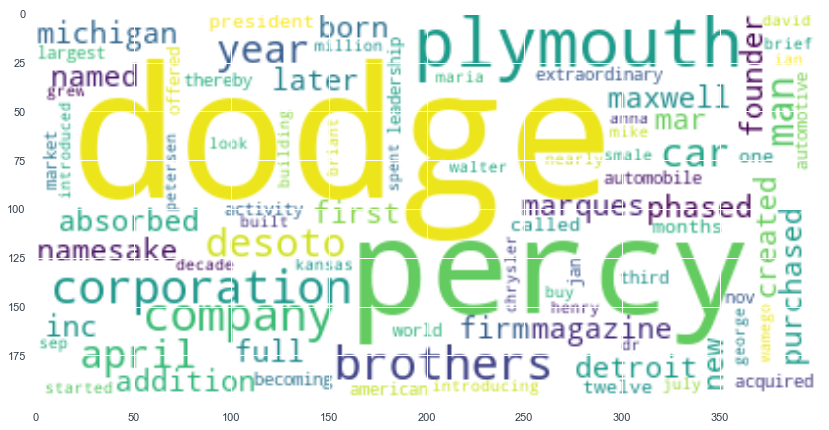

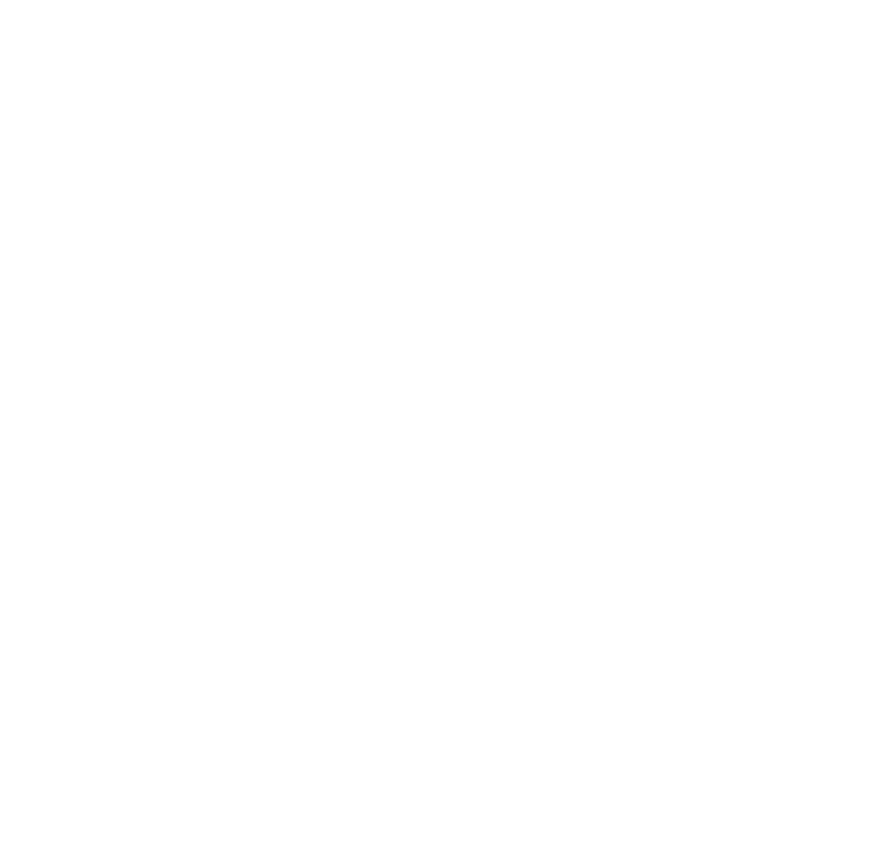

Owen D. Young 1929
[('october', 3), ('new', 3), ('van', 3), ('oct', 3), ('july', 2), ('american', 2), ('aug', 2), ('hornesville', 2), ('york', 2), ('magazine', 2)]


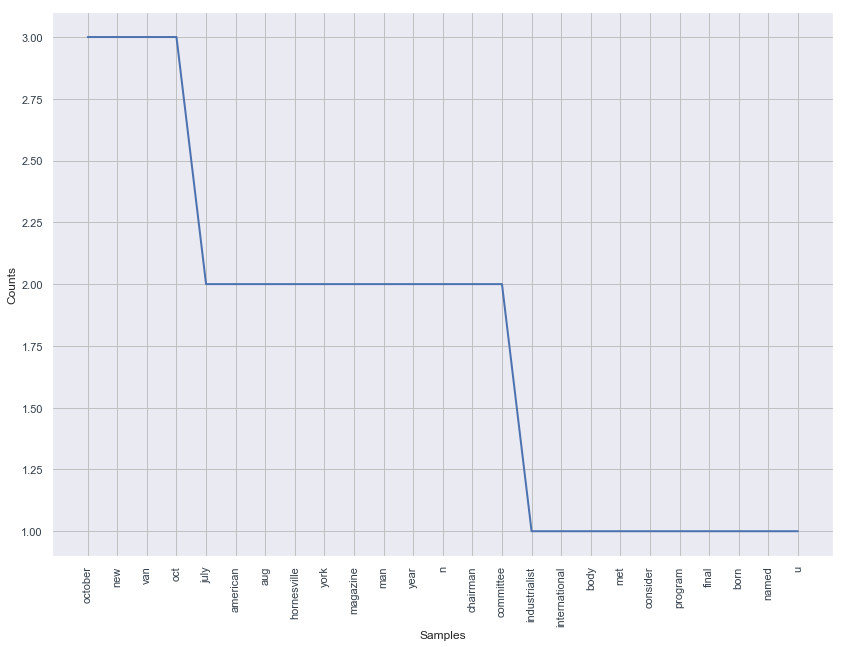

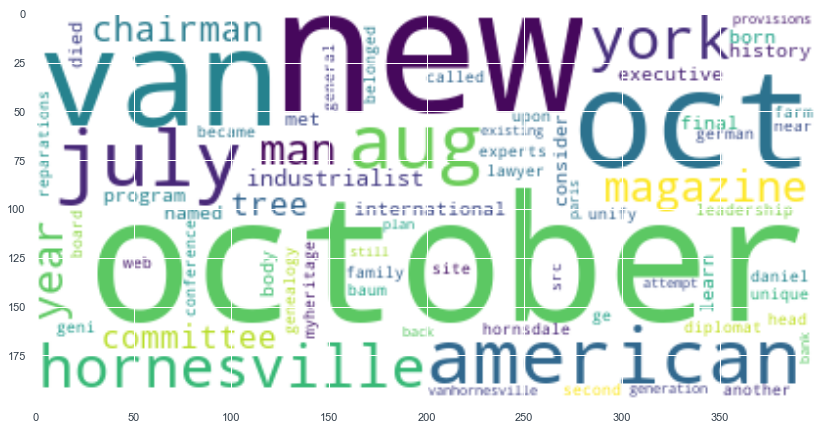

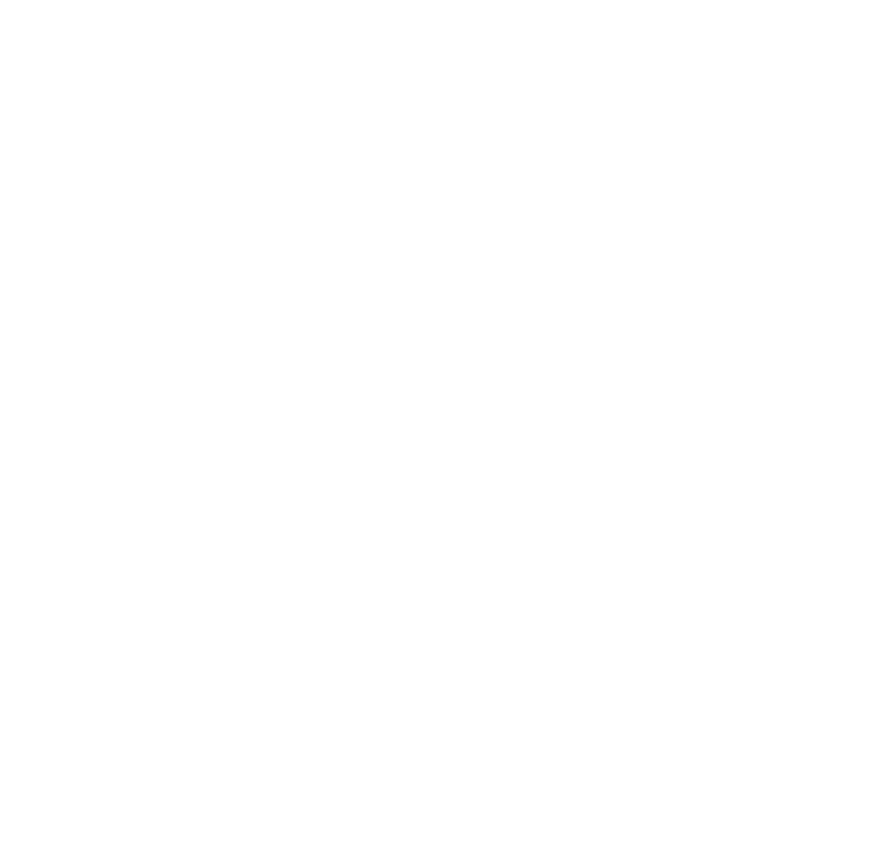

Mahatma Gandhi 1930
[('march', 11), ('salt', 6), ('dandi', 5), ('mohandas', 4), ('mar', 3), ('uploaded', 3), ('oct', 3), ('satyagraha', 2), ('indian', 2), ('british', 2)]


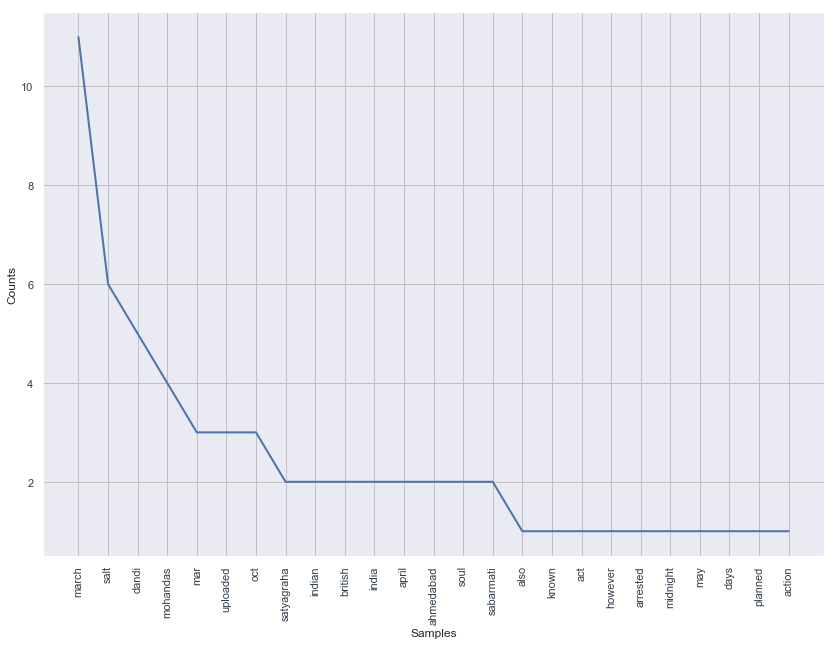

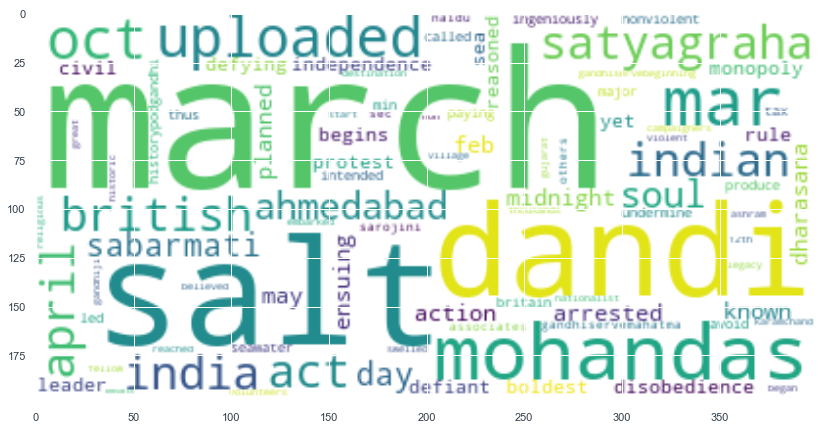

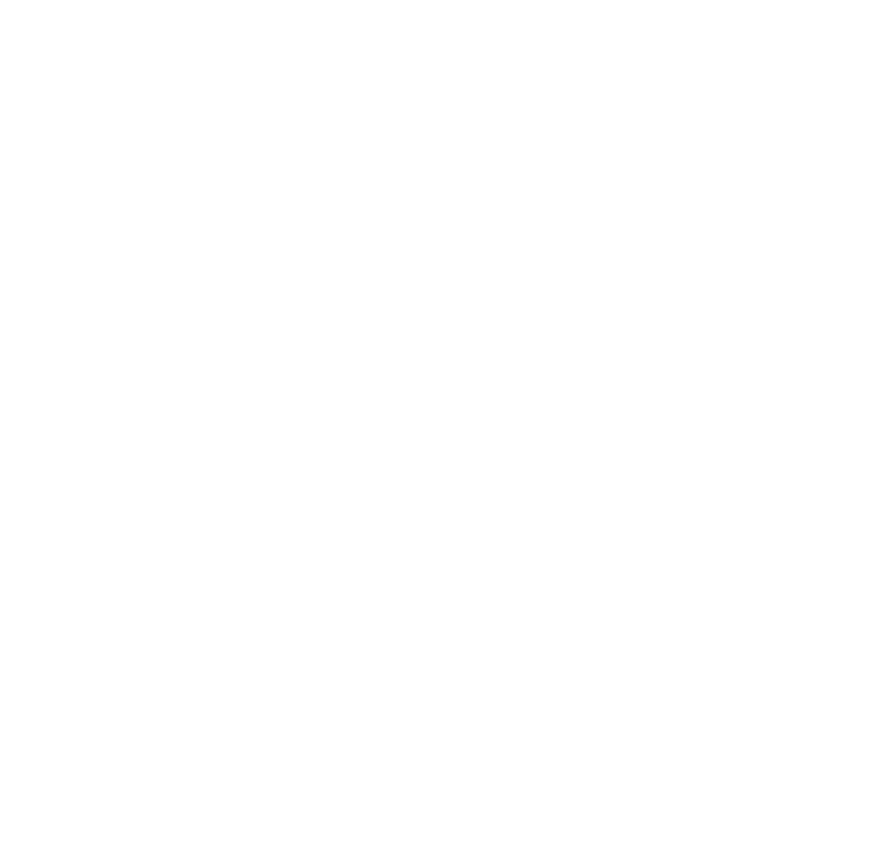

In [10]:

#'https://www.google.com/search?safe=active&client=safari&rls=en&ei=CCbJXMGTMf7dz7sPoqmxuAY&q=Mahatma+Gandhi+1930&oq=Mahatma+Gandhi+1930&gs_l=psy-ab.3..35i39j0i333l2.805330.807599..808108...0.0..0.862.1192.4j6-1....1..0....1..gws-wiz.......0i67j0j0i22i30.k1wvDqEd-V8

#subjectivity = 0
#sentiment = 0
#url = 'https://www.google.com/?client=safari'.format(term)
#rank = 1


def run(term):
    url = "https://www.google.com/search?hl=en&q=" + term
    response = requests.get(url)
    #print(response.text)
    soup = BeautifulSoup(response.text, 'html.parser')
    headline_results = soup.findAll('div', class_= 'g')
    
    sw = nltk.corpus.stopwords.words('english')
    new_words = []
    
    for h in headline_results:
        link = h.find('a', href=True)
        title = h.find('h3')
        description = h.find('span', attrs={'class': 'st'})

        if description:
            blob = TextBlob(description.get_text())
            description = description.get_text()  #the string 
            #print(description)
            description = re.findall('\w+', description)  #make into list of words
            #print(description)

            for word in description:
                if (word not in new_words): #not already present
                    if (word.isnumeric() == False): #not a anumber
                        if word not in term: #not the search term itself
                            word = word.lower()
                            if word not in sw:
                                new_words.append(word)
                                #print(new_words)

            
    #self.sentiment += blob.sentiment.polarity/ len(headline_results)
    #self.subjectivity += blob.sentiment.subjectivity / len(headline_results)
    #print(a.term, 'Subjectivity', a.subjectivity, 'Sentiment', a.sentiment)

    
    #print(new_words)
    freqdist1 = nltk.FreqDist(new_words)
    #print(freqdist1)
    print(freqdist1.most_common(10))
    freqdist1.plot(25)
    
    
    myString = " ".join(new_words)
    wordcloud = WordCloud(background_color="white").generate(myString)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.figure(figsize=[15,15])
    plt.axis("off")
    plt.show()

    

#for i in range (0, len(data.index)):  
for i in range (0, 4):
    a = str(data.iloc[i,2]) # name
    b = ' ' + str(data.iloc[i,0]) # year
    if np.isnan(data.iloc[i, 0]) == True  :
        b = ''
    term = a + b
    print(term)
    run(term)




  